## Project recap

**Notes:**

#### I stablished the non normality of the `totalAmount` and may be a good idea to work with the log as shown to be qualities of a normal distribution.

In this notebook Im going to work on:

- Apply descriptive and inferential statistics, probability distributions, confidence intervals, and hypothesis testing in Python
- Articulate findings in an executive summary for external stakeholders 


The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC: to analyze the relationship between fare amount and payment type. You also discover follow-up emails from three other team members: Deshawn Washington, Luana Rodriguez, and Udo Bankole. These emails discuss the details of the analysis. A final email from Luana includes your specific assignment: to conduct an A/B test. 


In [1]:
## loading libraries in memory 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import eda_functions as eda

import scipy
from scipy import stats
## For encoding
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

# Descriptive statistics and A/B test


**The purpose** of this A/B test is to find ways to generate more revenue for taxi cab drivers. 

**Note**: For the purpose of this exercise, we assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.

*This activity has two parts:*

**Part 1:** Exploratory data analysis 

* Computing descriptive statistics

**Part 2:** Hypothesis testing with Python

* Conducting a two-sample hypothesis test

In [2]:
## Path of the csv file
path  = '2017_Yellow_Taxi_Trip_Data.csv'

## Defining and observing the first 5 exemples:
df = pd.read_csv(path, index_col=0)

In [3]:
df.head()

,vendorID,pickup_dt,dropoff_dt,week,month,quarter,day,hour,tripTime,distance,...,dOffLocID,paymenType,fareAmnt,extra,mtaTax,tip,tollsAmount,improvementSrchrg,totalAmount,log
unnamed,,,,,,,,,,,,,,,,,,,,,
111133227,2,2017-01-01 00:08:25,2017-01-01 00:17:20,52,1,1,Sunday,0,8.916667,0.52,...,161,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.230014
111139506,1,2017-01-01 00:26:35,2017-01-01 00:36:12,52,1,1,Sunday,0,9.616667,0.90,...,164,1,7.5,0.5,0.5,1.75,0.0,0.3,10.55,2.446685
111145951,1,2017-01-01 00:43:10,2017-01-01 00:57:21,52,1,1,Sunday,0,14.183333,4.90,...,233,2,17.0,0.5,0.5,0.00,0.0,0.3,18.30,2.960105
111147465,2,2017-01-01 00:47:06,2017-01-01 00:51:45,52,1,1,Sunday,0,4.650000,0.80,...,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,2.214846
111055119,1,2017-01-01 01:21:59,2017-01-01 01:34:12,52,1,1,Sunday,1,12.216667,2.10,...,158,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,2.509599


## Stablishing Normality, Eliminitaing outliers

There are exemples is the data set that have missleading values.


In [4]:
## dropping outliers
df = df[df['totalAmount'] > 0]
df = df[df['totalAmount'] < 400]

## Dropping the distance values equal to zero
df = df[df['distance'] != 0.0]

## Dropping not a numbers.
## in the log of the totalAmount.
df.dropna(inplace=True)

## Validating and observing meassurements

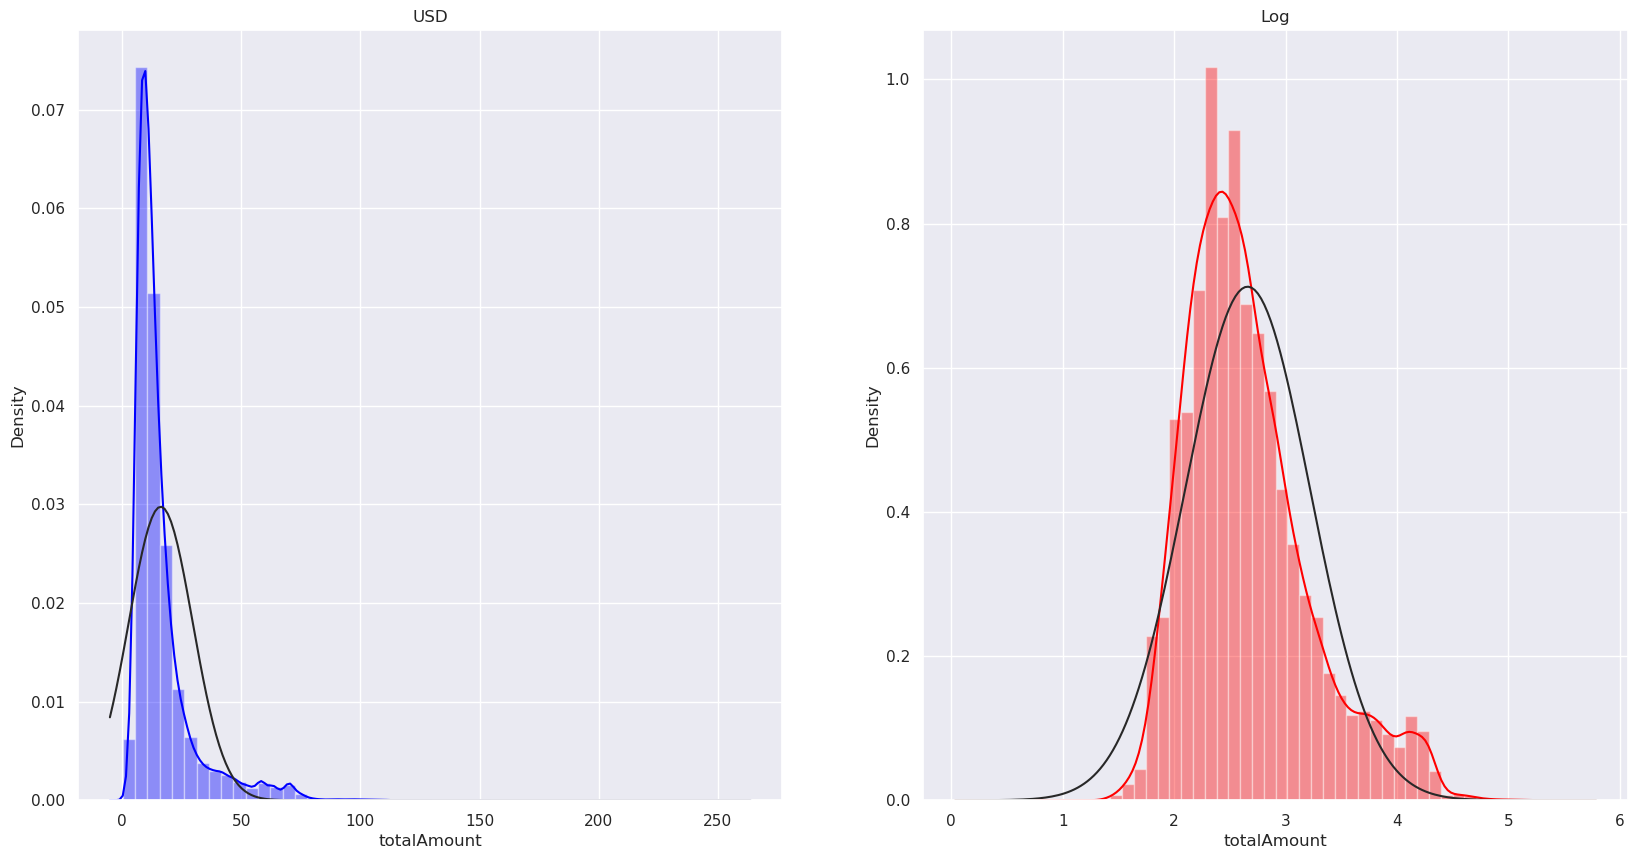

In [5]:
## this is the distibution of the total Amount. I also log it to compare.
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.distplot(df['totalAmount'], kde=True, fit=scipy.stats.norm , color='Blue') 
plt.title('USD')
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df['totalAmount']), kde=True, fit=scipy.stats.norm, color='Red') ## fits is deprecated, still good to demo.
plt.title('Log');

In [6]:
eda.estadisticas(df, 'log')

,log
observations,22536.000000
minimun,0.262364
maximun,5.557639
mean,2.658721
variance,0.313561
skewness,0.941178
kurtosis,0.783494


In [7]:
eda.estadisticas(df, 'totalAmount')

,totalAmount
observations,22536.000000
minimun,0.300000
maximun,258.210000
mean,16.202153
variance,179.846494
skewness,3.061918
kurtosis,15.397650


In [8]:
## comparing the data values with the empirical rule
eda.empirical(df, 'log')

,log,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.73,0.680,0.050
Frac of the values within +/- 2 SD from the mean,0.94,0.950,0.010
Frac of the values within +/- 3 SD from the mean,1.00,0.997,0.003


In [9]:
## Testing whether the sample differs from a normal distribution
zScore, pVal = scipy.stats.normaltest(df['log'])
alpha = 5e-3
print("p-value = {:g}".format(pVal))
print("z-score = {:g}".format(zScore))

if pVal < alpha:  # null hypothesis: df['totalAmount'] comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p-value = 0
z-score = 2740.96
The null hypothesis can be rejected


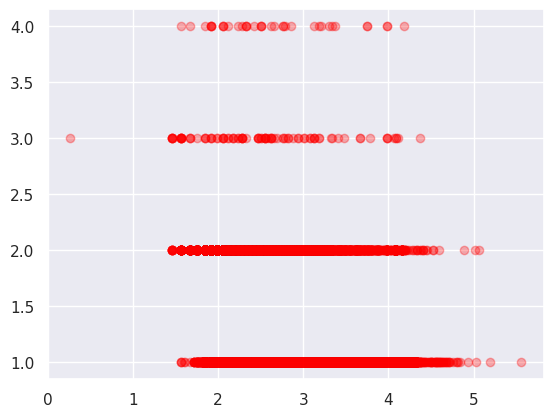

In [10]:
## The relationship between fare amount and payment type
## We can also see outliers. I will eliminate them.
fig1, ax1 = plt.subplots()
ax1.scatter(df['log'], df['paymenType'], c='red', alpha=0.3);

In [11]:
cash  = df[df['paymenType'] == 2]
cc    = df[df['paymenType'] == 1]
noChg = df[df['paymenType'] == 3]
dsp   = df[df['paymenType'] == 4]

                      log
observations  7203.000000
minimun          1.458615
maximun          5.062975
mean             2.497803
variance         0.293018
skewness         1.045024
kurtosis         1.038573


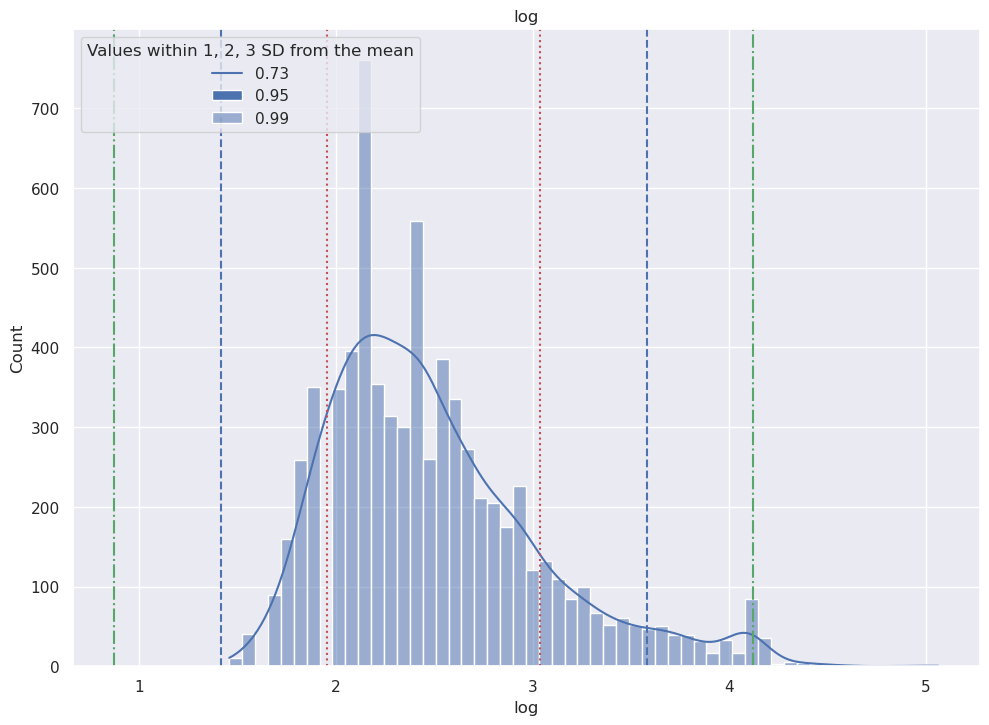

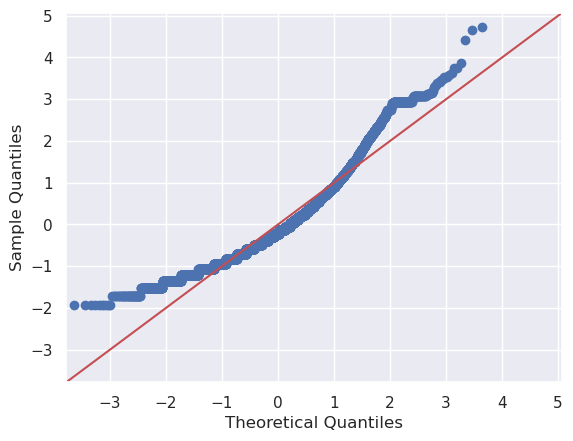

In [12]:
print(eda.estadisticas(cash, 'log'))
eda.distribution(cash, 'log')

                       log
observations  15202.000000
minimun           1.568616
maximun           5.557639
mean              2.735976
variance          0.302645
skewness          0.993023
kurtosis          0.774983


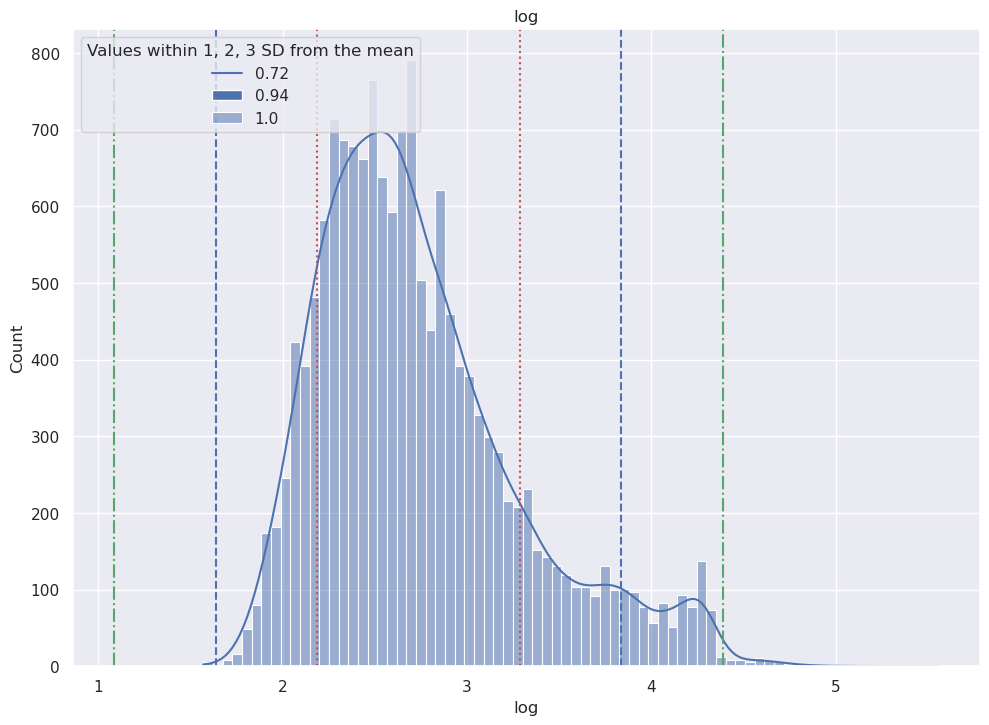

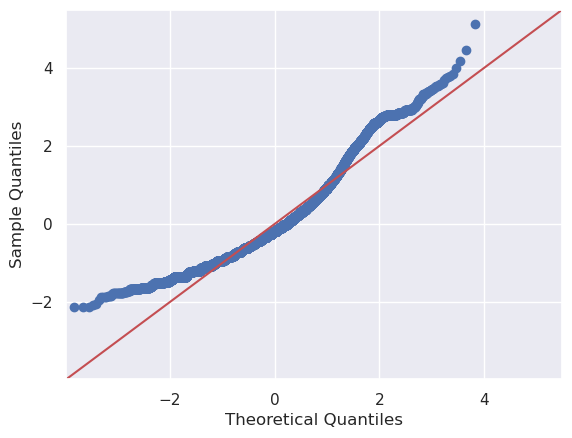

In [13]:
print(eda.estadisticas(cc, 'log'))
eda.distribution(cc, 'log')

# *Confidence Intervals*

We have stablish some normality and will assume normality of the log of the `totalAmount`

**Note**: 
    Since we have the following restrictions:
    For the purpose of this exercise, we assume that the sample data comes 
    from an experiment in which customers are randomly selected and divided 
    into two groups: 1) customers who are required to pay with credit card, 
    2) customers who are required to pay with cash. Without this assumption, 
    we cannot draw causal conclusions about how payment method affects fare amount.

I dont know what are the population of the groups.
I will pretend that the total of each group is the population of each group
and I will sample from there.


## Constructing a 95 confidence interval for the means of credit card and cash

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.
 
---
 
### Find margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |



In [16]:
## 1. and 2. 

population = df['log'].shape[0]
sample_cc  = cc.shape[0]
sample_cash = cash.shape[0]
mean_cc = cc['log'].mean()
mean_cash = cash['log'].mean()
mean_p = df['log'].mean()
alpha = 0.95
zVal = 1.96


In [17]:
## Standard errors and margin of error ME

# credit card

standard_error_creditcard = cc['log'].std() / np.sqrt(sample_cc)
ME_creditcard = standard_error_creditcard * zVal

# cash

standard_error_cash = cash['log'].std() / np.sqrt(sample_cash)
ME_cash = standard_error_cash * zVal


In [18]:
## confident intervals

# credit card

upperCIlim_cc = mean_cc + ME_creditcard
lowerCIlim_cc = mean_cc - ME_creditcard

# cash

upperCIlim_cash = mean_cash + ME_cash
lowerCIlim_cash = mean_cash - ME_cash

In [19]:
print(f'CONFIDENT INTERVAL CREDIT CARD: {alpha*100}% CI [{lowerCIlim_cc}, {upperCIlim_cc}]')

CONFIDENT INTERVAL CREDIT CARD: 95.0% CI [2.7272310677622986, 2.7447215721240488]


In [20]:
print(f'CONFIDENT INTERVAL CASH: {alpha*100}% CI [{lowerCIlim_cash}, {upperCIlim_cash}]')

CONFIDENT INTERVAL CASH: 95.0% CI [2.485301953875727, 2.5103040344387844]


In [21]:
print(f'MEAN POPULATION: {mean_p}') ## assumed but just for the exercise.

MEAN POPULATION: 2.6587209609465305


## CONFIDENT INTERVAL CREDIT CARD: `95.0% CI [2.72, 2.74]`
## CONFIDENT INTERVAL CASH: `95.0% CI [2.48, 2.51]`

In [22]:
## We can also use stats.norm.interval, but is the same. Although there is some variation in the decimals.
cicc = stats.norm.interval(alpha=0.95, loc=mean_cc, scale=standard_error_creditcard)
cicash = stats.norm.interval(alpha=0.95, loc=mean_cash, scale=standard_error_cash)

## Also, 

Bringing back the interval back to USD.
Seems like credit cards are prefered when the amounts are higher ( as an average)
But we still need some more calculations to be able to inference that.

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger total fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in total fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.

In [23]:
## We can expect that 95% of these intervals will capture the population mean.
np.exp(cicc)

array([15.29049248, 15.56027841])

In [24]:
np.exp(cicash)

array([12.00474734, 12.30866892])

# Conducting the A/B test

**The purpose** of this A/B test is to find ways to generate more revenue for taxi cab drivers. 

**Note**: For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.


### **Null hypothesis**: There is no difference in average total fare between customers who use credit cards and customers who use cash. 

### **Alternative hypothesis**: There is a difference in average total fare between customers who use credit cards and customers who use cash

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 
|

In [27]:
stats.ttest_ind(a=cc['log'], b=cash['log'], equal_var=False)

Ttest_indResult(statistic=30.598438827362607, pvalue=3.0230578469005053e-199)

In [28]:
stats.ttest_ind(a=cc['totalAmount'], b=cash['totalAmount'], equal_var=False)

Ttest_indResult(statistic=22.67632914542927, pvalue=3.212819169877125e-112)

Since the p-value is extremely small (much smaller than the significance level of 5%), you reject the null hypothesis. You conclude that there is a statistically significant difference in the average total fare amount between customers who use credit cards and customers who use cash.

**Exemplar responses:**
1.   The key business insight is that encouraging customers to pay with credit cards will likely generate more revenue for taxi cab drivers. 

2.   This project requires an assumption that passengers were forced to pay one way or the other, and that once informed of this requirement, they always complied with it. The data was not collected this way; so, an assumption had to be made to randomly group data entries to perform an A/B test. This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa. The difference between average card payment fare and cash fare is inflated, because we use the total amount as the comparing variable. But cash fares all have tip values of $0, while card payments have non-zero values. A possible reason for this occurance is because cash tips aren't declared. In turn, this means that we capture tips in one group but not in the other. Instead, one should be comparing the `fare_amount` column.